In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import wikipedia

In [2]:
df = pd.read_csv('Corpus/stemmed_29.07.2020.last_29k.csv')

english = pd.read_csv('Corpus/english.csv', sep='{', error_bad_lines=False)

df['original_text'] = df['original_text'].astype(str)
df['dictionaries_words_stem'] = df['dictionaries_words_stem'].astype(str)
df['28k_words_stem'] = df['28k_words_stem'].astype(str)
df['golang_algo'] = df['golang_algo'].astype(str)
df['76k_words_stem'] = df['76k_words_stem'].astype(str)
df['label'] = pd.to_numeric(df['label'])
df['english'] = english.text
df

,original_text,label,dictionaries_words_stem,28k_words_stem,golang_algo,76k_words_stem,english
0,лива туввар сирия аллажатта islamstateқа қарсы...,1,лива ту сирия алла islamstateқа қар ұрыс бас,ли ту сирия алла is қарс ұрыс баст,лива туввар сирия алла islamstateқа қарс ұрыс ...,ли ту сирия алла islamstateқа қарсы ұрыс баста,liva tuvvar siri allajatta fights against isla...
1,террористік иттер бүлікшілерге айналады turke...,1,тер ит бүлік айнала turkey pkk twitterkurds ht...,терр итте бүлі айна turk pkk twitterkurds http t,терр итте бүлі айна turkey pkk twitterkurds ht...,террор ит бүлікшіл айнала turkey pkk twitterku...,terrorist dogs become rebels turkey pkk twitte...
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1,әл газваты арнайы аймақ олар кейін олар ал қай...,әлха газ арна ай олар кей олар ал қайт орал,әлха газваты арна айма олар кейі олар алеппеге...,әл газ арнайы аймақ ол кейін ол ал қай орал,alkhair's gazwat is a special area after which...
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1,сирия ресей n бас кір туралы алаң кір мүмкін е...,сирия ресей n басы кіру тура алаң кіру мүмк ем...,сирия ресей n басы кіру тура алаң кіру мүмк ем...,сирия ресей n басы кіру туралы алаңда кіру мүм...,"The defense of one Friday in Mecca, which cann..."
4,ядролық соғыс соғысы келе жатыр,1,ядролық соғыс соғыс кел жатыр,ядро соғы соғы келе жаты,ядро соғы соғы келе жаты,ядролы соғыс соғыс келе жатыр,nuclear war is coming;
...,...,...,...,...,...,...,...
29331,періште көпше араб малайкат жекеше араб малайк...,0,періште көп ара малай жеке ара малай алла таға...,пері көпш араб мала жеке араб мала алла таға н...,пері көпш араб мала жеке араб мала алла таға н...,періште көп араб малай жекеше араб малай алла ...,angels plural Arab angels private Arab angels ...
29332,иманның алты шартының ең әуелгісі алла тағалағ...,0,иман алты шарт ең әуелгі алла таға иман ақыл б...,иман алты шарт ең әуел алла таға иман ақыл бүт...,иман алты шарт ең әуел алла таға иман ақыл бүт...,иман алты шарт ең әуелгі алла тағала иман ақыл...,The first of the six conditions of faith is to...
29333,"иман иман араб сенім сену, илану, қабылдау алл...",0,иман иман ара сенім сен илану қабылда алла тағ...,иман иман араб сені сену илан қабы алла таға ө...,иман иман араб сені сену илан қабы алла таға ө...,иман иман араб сенім сену илан қабылдау алла т...,Iman Iman Iman Iman Iman Iman Iman Iman Iman I...
29334,ассабуур аса сабырлы club qissa angimeler,0,ас аса сабырлы club qissa angimeler,асса аса сабы club qissa an,асса аса сабы club qissa angimeler,асса аса сабырлы club qissa angimeler,assabuur very patient club qissa angimeler;


## Defs

### statisticsx2 + LIWCx2 + POSx2, 
### Stemmingx6 + Samplingx6
### TF-IDFx2 + Algorithmsx6

### Статистика
TF-IDF

TF-IDF + Statistics

TF-IDF + Statistics + POS

TF-IDF + Statistics + POS + LIWC

TF-IDF + Statistics + POS + LIWC + stemming

TF-IDF + Statistics + POS + LIWC + stemming + sampling

In [3]:
methods = [['stemming', 'sampling'], ['statistics', 'tf-idf', 'pos', 'liwc']]
# methods = [['stemming', 'sampling'], ['tf-idf', 'statistics', 'pos', 'liwc']]

In [4]:
def different_classifier_methods(df, validate_data=None):
    type_method = (
        ('before', ['original_text', 'english', 'label']),
        ('simple', ['dictionaries_words_stem', 'english', 'label']),
        ('large', ['76k_words_stem', 'english', 'label'])
    )
    results = []
    for name, slicing in type_method:
        print('stemming type: ', name)
        ext = df[slicing].loc[df['label'] == 1].values.tolist()
        neu = df[slicing].loc[df['label'] == 0].values.tolist()
        for i in range(3):
            sample_type, balanced = sampling(ext, neu, i)
            print('sampling type', sample_type) 
            alg_res = algorithms_train(balanced, (name, sample_type), validate_data)
            results += alg_res
    return results

In [5]:
def sampling(ext, neu, n_num = 0):
  name = ''
  if n_num == 1:
    name = 'under'
    length = len(ext) if len(ext) < len(neu) else len(neu)
    balanced = pd.DataFrame(ext[:length]+neu[:length], columns = ['text', 'english', 'label'])
  elif n_num == 2:
    name = 'over'
    print(len(neu), len(ext))
    ext = ext*int(len(neu)/(len(ext)*2)) if len(neu)/len(ext) > 1 else ext
    neu = neu*int(len(ext)/(len(neu)*2)) if len(ext)/len(neu) > 1 else neu
    balanced = pd.DataFrame(ext+neu, columns = ['text', 'english', 'label'])
  elif n_num == 0:
    name = 'default'
    balanced = pd.DataFrame(ext+neu, columns = ['text', 'english', 'label'])
    
  balanced['category'] = balanced['label'].apply(lambda x: "extremist" if x==1 else "neutral")
  return name, balanced

### POS, LIWC, STATISTICS defs

### Statistics

In [6]:
def statistics_feature(x):
    result = []
    result += [len(set(x.split(' '))) / len(x.split(' '))]
    result += [len(x.split(' ')) / len(x)]
    
    result += [len(x.split(' '))]
    result += [len(set(x.split(' ')))]
    result += [len(x)]
    
    for i in 'абвгдежзийклмнопрстуфхцчшщъыьэюяәіəңғүұқөһ':
        result.append(sum([i == k for k in x]))
    return result

### POS

In [7]:
import nltk
def token_post_tag(x):
    from nltk.data import load
    tagdict = list(load('help/tagsets/upenn_tagset.pickle').keys())
    
    tags = nltk.pos_tag(nltk.word_tokenize(x))
    
    result = []
    for j, tag in enumerate(tagdict):
        result.append(sum([i == tag for k, i in tags]))
        
    return result

### LIWC

In [8]:
import liwc
parse, category_names = liwc.load_token_parser('Corpus/LIWC2007_English100131.dic')

import re
from collections import Counter

def tokenize(text):
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

def LIWC_sum(x):
    counts = Counter(category for token in tokenize(x) for category in parse(token))
    
    result = []
    for j, tag in enumerate(category_names):
        result.append(counts[tag])
    
    return result

### model training

In [9]:
from sklearn.preprocessing import OneHotEncoder
from keras import Sequential
from keras.layers import *
from sklearn.preprocessing import StandardScaler

def nn(X_tr, X_te, y_tr, n_epochs):
    enc = OneHotEncoder(handle_unknown='ignore')
    y_tr_cat = enc.fit_transform(y_tr.values.reshape((y_tr.values.shape[0], 1))).toarray()
    X_tr_scaled, X_te_scaled = StandardScaler().fit_transform(X_tr.toarray()), StandardScaler().fit_transform(X_te.toarray())
    
    nn = Sequential()
    nn.add(Dense(16, activation='relu', input_dim=X_tr.shape[1]))
    nn.add(Dense(32, activation='relu'))
    nn.add(Dense(2, activation='softmax'))
    nn.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
    history = nn.fit(X_tr_scaled, y_tr_cat, epochs=n_epochs, validation_split=0.01, verbose=0)
    predicted = nn.predict(X_te_scaled)
    return enc.inverse_transform(predicted), predicted[:,1] ## getting predict and predict probability

In [10]:
import time
from scipy import sparse

def algorithms_train(df, model_type, val_df=None):
    start = time.time()
    np.random.seed(40)
    val_pre = ''
    X_train, X_test, y_train, y_test = train_test_split(df[['text', 'english']], df['label'], random_state=40, test_size = 0.2)
    if val_df is not None:
        print('True')
        X_test = pd.concat([X_test[y_test == 1], val_df[['text', 'english']]], ignore_index=True)
        y_test = pd.concat([y_test[y_test == 1], val_df['label']], ignore_index=True)
        val_pre = 'validation'
        
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
  
    x_train_v = sparse.csr_matrix(X_train['english'].apply(lambda x: statistics_feature(x)).values.tolist())
    x_test_v = sparse.csr_matrix(X_test['english'].apply(lambda x: statistics_feature(x)).values.tolist())

    vectorizer = TfidfVectorizer(lowercase=True, max_df = 0.1, min_df=0.0007) #76k algortithms
    x_train_tf = vectorizer.fit_transform(X_train['text'])
    x_test_tf = vectorizer.transform(X_test['text'])
    
    liwc_train = sparse.csr_matrix(X_train['english'].apply(lambda x: LIWC_sum(x)).values.tolist())
    liwc_test = sparse.csr_matrix(X_test['english'].apply(lambda x: LIWC_sum(x)).values.tolist())
    
    pos_train = sparse.csr_matrix(X_train['english'].apply(lambda x: token_post_tag(x)).values.tolist())
    pos_test = sparse.csr_matrix(X_test['english'].apply(lambda x: token_post_tag(x)).values.tolist())
    
    lr = LogisticRegression(n_jobs=-1)
    knn = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10, n_jobs=-1)
    svm = SVC(C=0.0001, probability=True, max_iter=100)
    nb = MultinomialNB()
    dt = DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_split=10, max_depth=5, random_state=40)
    rf = RandomForestClassifier(n_estimators=62, criterion='entropy', max_depth=10,n_jobs=-1, random_state=40)
    gbdt = GradientBoostingClassifier(n_estimators=62, random_state=40)
    n_epochs = 2

    '''
    classifier_algorithms = (
        ('NN', nn),
        ('GBDT', gbdt)
    )
    '''
    classifier_algorithms = (
        ('Logistic Regression', lr),
        ('K-Nearest Neighbors', knn),
        ('Support Vector Machine', svm),
        ('Naive Bayes', nb),
        ('Decision Tree', dt),
        ('Random Forest', rf),
        ('GBDT', gbdt),
        ('NN', nn)
    )
    
  
    label_names = ['Neutral', 'Extremist']
    meths = ['statistics', 'tfidf', 'pos', 'liwc']

    score_list = []
    for queue, meth in enumerate(meths):
        if queue == 1:
            x_train_v = sparse.hstack((x_train_v, x_train_tf))
            x_test_v = sparse.hstack((x_test_v, x_test_tf))
            ## Adding POS features
        elif queue == 2:
            x_train_v = sparse.hstack((x_train_v, liwc_train))
            x_test_v = sparse.hstack((x_test_v, liwc_test))
            ## Adding POS features
        elif queue == 2:
            x_train_v = sparse.hstack((x_train_v, pos_train))
            x_test_v = sparse.hstack((x_test_v, pos_test))
            ## Adding LIWC features
        
        ## Starting train and saving models to the files for testing
        for name, algorithm in classifier_algorithms:
            print(name)
            
            if name == 'Naive Bayes':
                algorithm.fit(x_train_v.toarray(), y_train)
                predicted = algorithm.predict(x_test_v.toarray())
                predicted_proba = algorithm.predict_proba(x_test_v.toarray())[:,1]
            elif name == 'NN':
                predicted, predicted_proba = algorithm(x_train_v, x_test_v, y_train, n_epochs)
            else:
                algorithm.fit(x_train_v, y_train)
                predicted = algorithm.predict(x_test_v)
                predicted_proba = algorithm.predict_proba(x_test_v)[:,1]
                
            
            accuracy = accuracy_score(y_test, predicted)
            precision = precision_score(y_test, predicted)
            recall = recall_score(y_test, predicted)
            f1 = f1_score(y_test, predicted)
            auc_roc = roc_auc_score(y_test, predicted_proba)
            #confusion_score = confusion_matrix(y_test, predicted)
            
            plotting_auc_curve(y_test, predicted_proba, name, ' '.join([model_type[0], model_type[1]]+meths[0:queue+1]))

            score_list.append([model_type[0], model_type[1]]+['_'.join(meths[0:queue+1])]+[name, accuracy, precision, recall, f1, auc_roc])
        
        plt.savefig('figures/'+val_pre+'_'.join([model_type[0], model_type[1]]+meths[0:queue+1])+'.png')
        plt.clf()
        
    print((time.time() - start),'sec')
    return score_list

### Roc Auc curve polotting

In [11]:
from sklearn.metrics import roc_curve, auc

def plotting_auc_curve(y_test, predict_proba, name, title):
    fpr, tpr, _ = roc_curve(y_test, predict_proba)
    plt.title('Receiver Operating Characteristic, '+title)
    plt.plot(fpr, tpr, label = name)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Unused defs or less used

In [12]:
def classification_results(ext, neu, sample_type = 'default'):
  balanced = 0
  if sample_type == 'under':
    length = len(ext) if len(ext) < len(neu) else len(neu)
    balanced = pd.DataFrame(ext[:length]+neu[:length], columns = ['text', 'label'])
  elif sample_type == 'over':
    print(len(neu), len(ext))
    ext = ext*int(len(neu)/(len(ext)*2)) if len(neu)/len(ext) > 1 else ext
    neu = neu*int(len(ext)/(len(neu)*2)) if len(ext)/len(neu) > 1 else neu
    balanced = pd.DataFrame(ext+neu, columns = ['text', 'label'])
  elif sample_type == 'default':
    balanced = pd.DataFrame(ext+neu, columns = ['text', 'label'])

  balanced['category'] = balanced['label'].apply(lambda x: "extremist" if x==1 else "neutral")

  #pca visualization
  vector = TfidfVectorizer(lowercase=True, max_df = 0.1, min_df=0.0006)
  x_vis = vector.fit_transform(balanced['text'])
  y_vis = balanced['label'].values
  print(x_vis.shape)
  pcaplot(x_vis, y_vis)
  #tsneplot(x_vis, y_vis)

  '''
  #document information
  print('doc count:', balanced.loc[balanced['label'] == 1].shape[0])
  print('word counts:', balanced[balanced.label == 1]['text'].\
  apply(lambda x: len(x.split(' '))).sum())
  print('all doc lengths:', balanced[balanced.label == 1]['text'].\
  apply(len).sum())
  print('all doc word counts mean:', balanced[balanced.label == 1]['text'].\
  apply(lambda x: len(x.split(' '))).mean())
  print('all doc word lengths mean:', balanced[balanced.label == 1]['text'].\
  apply(lambda x: len(''.join(x.split(' ')))/len(x.split(' '))).mean())
  print('doc count:', balanced.loc[balanced['label'] == 0].shape[0])
  print('word counts:', balanced[balanced.label == 0]['text'].\
  apply(lambda x: len(x.split(' '))).sum())
  print('all doc lengths:', balanced[balanced.label == 0]['text'].\
  apply(len).sum())
  print('all doc word counts mean:', balanced[balanced.label == 0]['text'].\
  apply(lambda x: len(x.split(' '))).mean())
  print('all doc word lengths mean:', balanced[balanced.label == 0]['text'].\
  apply(lambda x: len(''.join(x.split(' ')))/len(x.split(' '))).mean())
  '''

  #Distribution
  balanced[balanced.label == 1]['text'].\
  apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", edgecolor="black", color = '#3498db', range=(0,300), alpha=0.5, label='Extremist').set(xlabel = 'Word length', ylabel = 'Count')
  balanced[balanced.label == 0]['text'].\
  apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", edgecolor="black", color = 'orange', range=(0,300), alpha=0.5, label='Neutral').set(xlabel = 'Word length', ylabel = 'Count')
  plt.show()

  #classification
  score_list = algorithms(balanced)
  return score_list

In [13]:
from sklearn.decomposition import PCA
def pcaplot(x, y):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(x.toarray())

  principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

  finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['target'])], axis = 1)
  finalDf['target'] = finalDf['target'].apply(lambda x: 'Neutral' if x == 0 else 'Extremist')

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = ['Neutral', 'Extremist']
  colors = ['r', 'b']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
  ax.legend(targets)
  ax.grid()
  plt.show()

In [14]:
from sklearn.manifold import TSNE
def tsneplot(x, y):
  tsne = TSNE(n_components=2, random_state=0)
  tsne_data = tsne.fit_transform(x)

  tsneDf = pd.DataFrame(data = tsne_data
             , columns = ['tsne 1', 'tsne 2'])

  finalDf = pd.concat([tsneDf, pd.DataFrame(y, columns=['target'])], axis = 1)
  finalDf['target'] = finalDf['target'].apply(lambda x: 'Neutral' if x == 0 else 'Extremist')

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('tsne 1', fontsize = 15)
  ax.set_ylabel('tsne 2', fontsize = 15)
  ax.set_title('2 tsne', fontsize = 20)
  targets = ['Neutral', 'Extremist']
  colors = ['r', 'b']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne 1']
               , finalDf.loc[indicesToKeep, 'tsne 2']
               , c = color
               , s = 10)
  ax.legend(targets)
  ax.grid()
  plt.show()

## Process

[Text(0.5, 0, 'Label'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'The composition of the classes')]

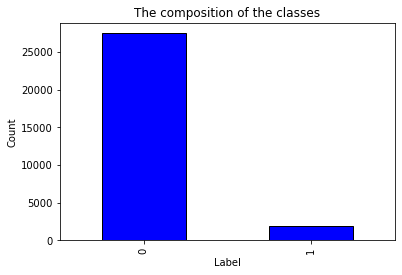

In [15]:
df['label'].value_counts().plot(kind='bar', ec="k", color = 'b').\
set(xlabel = 'Label', ylabel = 'Count', title='The composition of the classes')

[Text(0.5, 0, 'Word length'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'The distribution of word length in text')]

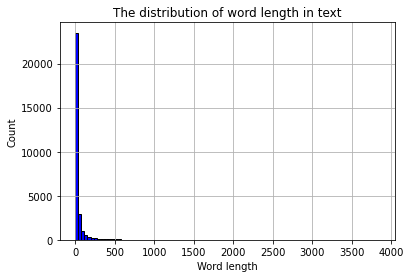

In [16]:
df['original_text'].apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", color = 'b').set(xlabel = 'Word length', ylabel = 'Count', title='The distribution of word length in text')

[Text(0.5, 0, 'Word length'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'The distribution of word length in text limited 100')]

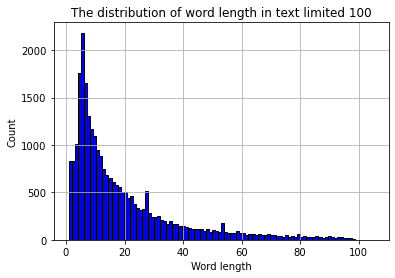

In [17]:
df[df['original_text'].apply(lambda x: True if len(x.split(' ')) > 0 and len(x.split(' ')) < 100 else False)]['dictionaries_words_stem'].\
apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", color = 'b').set(xlabel = 'Word length', ylabel = 'Count', title='The distribution of word length in text limited 100')

[Text(0.5, 0, 'Word length'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'The distribution of word length in text after length 1000 words')]

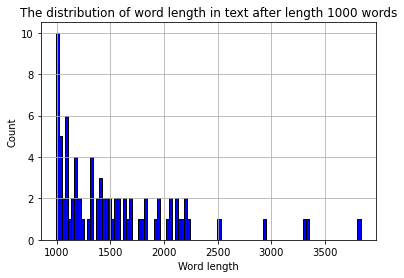

In [18]:
df[df['original_text'].apply(lambda x: True if len(x.split(' ')) > 1000 and len(x.split(' ')) < 10000 else False)]['dictionaries_words_stem'].\
apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", color = 'b').\
set(xlabel = 'Word length', ylabel = 'Count', title='The distribution of word length in text after length 1000 words')

[Text(0.5, 0, 'Text length'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'The distribution of text length')]

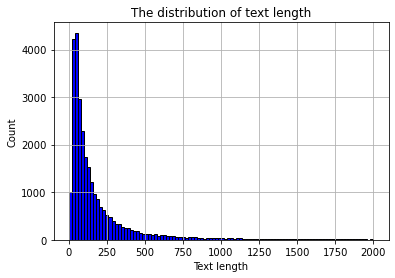

In [19]:
df['original_text'].apply(len).hist(bins=100, ec="k", color = 'b', range=(0, 2000)).\
set(xlabel = 'Text length', ylabel = 'Count', title='The distribution of text length')

[Text(0.5, 0, 'Text Id'),
 Text(0, 0.5, 'Word length'),
 Text(0.5, 1.0, 'The distribution of Neutral word length')]

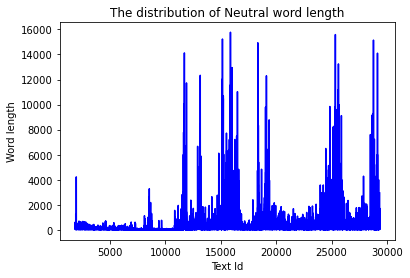

In [20]:
df[df.label == 0]['original_text'].apply(len).plot(color = 'blue').\
set(xlabel = 'Text Id', ylabel = 'Word length',  title='The distribution of Neutral word length')

[Text(0.5, 0, 'Text Id'),
 Text(0, 0.5, 'Word length'),
 Text(0.5, 1.0, 'The distribution of Extremist word length')]

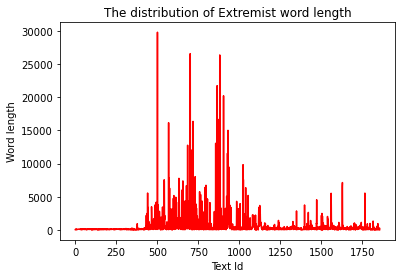

In [21]:
df[df.label == 1]['original_text'].apply(len).plot(color = 'red').\
set(xlabel = 'Text Id', ylabel = 'Word length',  title='The distribution of Extremist word length')

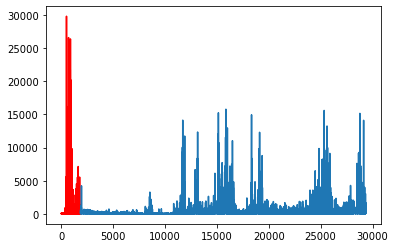

In [22]:
plt.plot(df[df.label == 1]['original_text'].apply(len), color='red', label='Extremist')
plt.plot(df[df.label == 0]['original_text'].apply(len), label='Neutral')
plt.show()

In [23]:
print('Extremist text shape:', df.loc[df['label'] == 1].shape)
print('Neutral text shape:', df.loc[df['label'] == 0].shape)

Extremist text shape: (1857, 7)
Neutral text shape: (27479, 7)


In [409]:
%%time
last_df = different_classifier_methods(df)

stemming type:  before
sampling type default
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.2369 - accuracy: 0.9302 - val_loss: 0.1701 - val_accuracy: 0.9489
Epoch 2/2
727/727 - 0s - loss: 0.1965 - accuracy: 0.9387 - val_loss: 0.1687 - val_accuracy: 0.9532
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1315 - accuracy: 0.9565 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 2/2
727/727 - 1s - loss: 0.0371 - accuracy: 0.9863 - val_loss: 0.0856 - val_accuracy: 0.9702
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1365 - accuracy: 0.9558 - val_loss: 0.0770 - val_accuracy: 0.9787
Epoch 2/2
727/727 - 1s - loss: 0.0353 - accuracy: 0.9868 - val_loss: 0.0881 - val_accuracy: 0.9745
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1492 - accuracy: 0.9512 - val_loss: 0.0640 - val_accuracy: 0.9830
Epoch 2/2
727/727 - 1s - loss: 0.0362 - accuracy: 0.9868 - val_loss: 0.0811 - val_accuracy: 0.9830
240.29248356819153 sec
sampling type under
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.5860 - accuracy: 0.7137 - val_loss: 0.4282 - val_accuracy: 0.8000
Epoch 2/2
92/92 - 0s - loss: 0.5041 - accuracy: 0.7671 - val_loss: 0.4000 - val_accuracy: 0.8000
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3644 - accuracy: 0.8371 - val_loss: 0.0904 - val_accuracy: 0.9667
Epoch 2/2
92/92 - 0s - loss: 0.0279 - accuracy: 0.9874 - val_loss: 0.0597 - val_accuracy: 1.0000
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.5048 - accuracy: 0.8038 - val_loss: 0.1124 - val_accuracy: 0.9333
Epoch 2/2
92/92 - 0s - loss: 0.0404 - accuracy: 0.9857 - val_loss: 0.1030 - val_accuracy: 0.9333
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.5083 - accuracy: 0.7759 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 2/2
92/92 - 0s - loss: 0.0467 - accuracy: 0.9844 - val_loss: 0.0242 - val_accuracy: 1.0000
37.451743602752686 sec
27479 1857
sampling type over
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.5325 - accuracy: 0.7502 - val_loss: 0.4823 - val_accuracy: 0.7994
Epoch 2/2
1002/1002 - 1s - loss: 0.4999 - accuracy: 0.7726 - val_loss: 0.4642 - val_accuracy: 0.8025
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 2s - loss: 0.1159 - accuracy: 0.9545 - val_loss: 0.0320 - val_accuracy: 0.9877
Epoch 2/2
1002/1002 - 2s - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0292 - val_accuracy: 0.9938
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 2s - loss: 0.1174 - accuracy: 0.9527 - val_loss: 0.0281 - val_accuracy: 0.9877
Epoch 2/2
1002/1002 - 2s - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0292 - val_accuracy: 0.9815
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 2s - loss: 0.1528 - accuracy: 0.9371 - val_loss: 0.0287 - val_accuracy: 0.9877
Epoch 2/2
1002/1002 - 2s - loss: 0.0140 - accuracy: 0.9967 - val_loss: 0.0204 - val_accuracy: 0.9938
451.94684052467346 sec
stemming type:  simple
sampling type default
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.2319 - accuracy: 0.9361 - val_loss: 0.2115 - val_accuracy: 0.9447
Epoch 2/2
727/727 - 0s - loss: 0.1970 - accuracy: 0.9383 - val_loss: 0.1862 - val_accuracy: 0.9362
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1453 - accuracy: 0.9477 - val_loss: 0.0829 - val_accuracy: 0.9872
Epoch 2/2
727/727 - 1s - loss: 0.0366 - accuracy: 0.9868 - val_loss: 0.0989 - val_accuracy: 0.9830
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1337 - accuracy: 0.9516 - val_loss: 0.0705 - val_accuracy: 0.9830
Epoch 2/2
727/727 - 1s - loss: 0.0344 - accuracy: 0.9883 - val_loss: 0.0840 - val_accuracy: 0.9830
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1139 - accuracy: 0.9643 - val_loss: 0.0845 - val_accuracy: 0.9787
Epoch 2/2
727/727 - 1s - loss: 0.0337 - accuracy: 0.9886 - val_loss: 0.1016 - val_accuracy: 0.9872
231.62338614463806 sec
sampling type under
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.6033 - accuracy: 0.7321 - val_loss: 0.4364 - val_accuracy: 0.8333
Epoch 2/2
92/92 - 0s - loss: 0.5107 - accuracy: 0.7599 - val_loss: 0.3875 - val_accuracy: 0.8333
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3920 - accuracy: 0.8126 - val_loss: 0.1186 - val_accuracy: 0.9333
Epoch 2/2
92/92 - 0s - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.1069 - val_accuracy: 0.9333
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.4511 - accuracy: 0.7997 - val_loss: 0.1324 - val_accuracy: 0.9667
Epoch 2/2
92/92 - 0s - loss: 0.0607 - accuracy: 0.9793 - val_loss: 0.0860 - val_accuracy: 0.9667
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3317 - accuracy: 0.8419 - val_loss: 0.1141 - val_accuracy: 0.9667
Epoch 2/2
92/92 - 0s - loss: 0.0515 - accuracy: 0.9806 - val_loss: 0.1107 - val_accuracy: 0.9667
33.42064380645752 sec
27479 1857
sampling type over
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.5240 - accuracy: 0.7559 - val_loss: 0.4738 - val_accuracy: 0.7963
Epoch 2/2
1002/1002 - 1s - loss: 0.4979 - accuracy: 0.7766 - val_loss: 0.4632 - val_accuracy: 0.8056
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1449 - accuracy: 0.9375 - val_loss: 0.0447 - val_accuracy: 0.9877
Epoch 2/2
1002/1002 - 1s - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0689 - val_accuracy: 0.9907
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1193 - accuracy: 0.9556 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 2/2
1002/1002 - 1s - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0481 - val_accuracy: 0.9877
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1388 - accuracy: 0.9436 - val_loss: 0.0285 - val_accuracy: 0.9938
Epoch 2/2
1002/1002 - 1s - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0208 - val_accuracy: 0.9938
396.530978679657 sec
stemming type:  large
sampling type default
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.2451 - accuracy: 0.9294 - val_loss: 0.1847 - val_accuracy: 0.9404
Epoch 2/2
727/727 - 0s - loss: 0.1977 - accuracy: 0.9381 - val_loss: 0.1726 - val_accuracy: 0.9489
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1268 - accuracy: 0.9574 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 2/2
727/727 - 1s - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0507 - val_accuracy: 0.9830
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1222 - accuracy: 0.9579 - val_loss: 0.0591 - val_accuracy: 0.9830
Epoch 2/2
727/727 - 1s - loss: 0.0306 - accuracy: 0.9892 - val_loss: 0.0544 - val_accuracy: 0.9830
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
727/727 - 1s - loss: 0.1186 - accuracy: 0.9616 - val_loss: 0.0683 - val_accuracy: 0.9787
Epoch 2/2
727/727 - 1s - loss: 0.0289 - accuracy: 0.9898 - val_loss: 0.0778 - val_accuracy: 0.9787
236.0049283504486 sec
sampling type under
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.5811 - accuracy: 0.7351 - val_loss: 0.4346 - val_accuracy: 0.8333
Epoch 2/2
92/92 - 0s - loss: 0.5063 - accuracy: 0.7650 - val_loss: 0.3911 - val_accuracy: 0.8333
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3455 - accuracy: 0.8528 - val_loss: 0.0714 - val_accuracy: 0.9667
Epoch 2/2
92/92 - 0s - loss: 0.0446 - accuracy: 0.9844 - val_loss: 0.0562 - val_accuracy: 0.9667
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3802 - accuracy: 0.8286 - val_loss: 0.0915 - val_accuracy: 0.9333
Epoch 2/2
92/92 - 0s - loss: 0.0473 - accuracy: 0.9820 - val_loss: 0.0906 - val_accuracy: 0.9667
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
92/92 - 0s - loss: 0.3689 - accuracy: 0.8245 - val_loss: 0.1470 - val_accuracy: 0.9667
Epoch 2/2
92/92 - 0s - loss: 0.0506 - accuracy: 0.9830 - val_loss: 0.1547 - val_accuracy: 0.9667
33.94158697128296 sec
27479 1857
sampling type over
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.5379 - accuracy: 0.7347 - val_loss: 0.4823 - val_accuracy: 0.7932
Epoch 2/2
1002/1002 - 1s - loss: 0.4994 - accuracy: 0.7709 - val_loss: 0.4770 - val_accuracy: 0.8025
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1164 - accuracy: 0.9544 - val_loss: 0.0244 - val_accuracy: 0.9907
Epoch 2/2
1002/1002 - 1s - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.0087 - val_accuracy: 1.0000
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1174 - accuracy: 0.9522 - val_loss: 0.0172 - val_accuracy: 0.9969
Epoch 2/2
1002/1002 - 1s - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0051 - val_accuracy: 1.0000
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Epoch 1/2
1002/1002 - 1s - loss: 0.1209 - accuracy: 0.9528 - val_loss: 0.0238 - val_accuracy: 0.9938
Epoch 2/2
1002/1002 - 1s - loss: 0.0099 - accuracy: 0.9977 - val_loss: 0.0158 - val_accuracy: 0.9938
409.5826802253723 sec
Wall time: 34min 31s


<Figure size 432x288 with 0 Axes>

### validate joke texts

In [24]:
%%time
jokes_df = pd.read_csv('Corpus/jokes.csv', index_col=0)
jokes_res_df = different_classifier_methods(df, jokes_df)

stemming type:  before
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
160.65703535079956 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
35.26889944076538 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
314.82816076278687 sec
stemming type:  simple
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
164.0271816253662 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
32.58142900466919 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
299.1453547477722 sec
stemming type:  large
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
156.8993763923645 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
31.424846172332764 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
302.1433608531952 sec
Wall time: 24min 57s


<Figure size 432x288 with 0 Axes>

### validate news text

In [25]:
%%time
news_df = pd.read_csv('Corpus/news.csv', index_col=0)
news_res_df = different_classifier_methods(df, news_df)

stemming type:  before
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
164.93686652183533 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
35.16071367263794 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
295.8888051509857 sec
stemming type:  simple
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
159.39615988731384 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
30.856292724609375 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
281.93479895591736 sec
stemming type:  large
sampling type default
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
153.0262770652771 sec
sampling type under
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine
Naive Bayes
Decision Tree
Random Forest


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
31.70398187637329 sec
27479 1857
sampling type over
True
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
Logistic Regression
K-Nearest Neighbors
Support Vector Machine


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Naive Bayes
Decision Tree
Random Forest
GBDT
NN
286.627482175827 sec
Wall time: 24min 1s


<Figure size 432x288 with 0 Axes>

### Saving to docx table

In [169]:
def doctable(data, tabletitle, pathfile):
    from docx import Document
    import pandas as pd
    document = Document()
    data = pd.DataFrame(data)  # My input data is in the 2D list form
    document.add_heading(tabletitle)
    table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
    for i, column in enumerate(data) :
        for row in range(data.shape[0]) :
            table.cell(row, i).text = str(data[column][row])
    document.save(pathfile)
    
def saving_doc_tables(df, name_csv):
    result_table4 = pd.DataFrame(df, columns=['stemming', 'sampling', 'features', 'algorithms', 'accuracy', 'precision', 'recall', 'f1', 'auc_roc'])
    result_table4.to_csv('Corpus/'+name_csv+'.csv', index=False)
    
    result_table4['featured'] = result_table4['stemming']+'_'+result_table4['sampling']+'_'+result_table4['features']
    result_table4['featured'] = result_table4['featured'].apply(lambda x: x.replace('_', ' + '))
    
    grouped = result_table4.groupby(['algorithms'])

    for key, item in grouped:
        docdf = grouped.get_group(key)[['algorithms', 'featured', 'accuracy', 'precision', 'recall', 'f1', 'auc_roc']]
        docdf.iloc[:, 2:] = round(docdf.iloc[:, 2:], 4)
        docdf.index = range(docdf.shape[0])
    
        doctable(docdf, key.replace(' ', ''), 'docs/'+name_csv+key.replace(' ', '')+'.docx')
        
    docdf = result_table4.iloc[result_table4.auc_roc.sort_values(ascending=False, inplace=False).index]\
        [['algorithms', 'featured', 'accuracy', 'precision', 'recall', 'f1', 'auc_roc']].iloc[:20,:]
    docdf.iloc[:, 2:] = round(docdf.iloc[:, 2:], 4)
    docdf.index = range(docdf.shape[0])
    doctable(docdf, 'best models', 'docs/'+name_csv+'bestmodels.docx')

In [170]:
saving_doc_tables(validated_df, 'validation_jokes')

### Plotting histogram

In [75]:
plot_jokes_df = pd.DataFrame(jokes_res_df, columns=['stemming', 'sampling', 'features', 'algorithms', 
                                    'accuracy', 'precision', 'recall', 'f1', 'auc_roc'])[['features', 'algorithms', 'accuracy',
                                                                                         'precision', 'recall', 'f1', 'auc_roc']]

In [76]:
plot_news_df = pd.DataFrame(news_res_df, columns=['stemming', 'sampling', 'features', 'algorithms', 
                                    'accuracy', 'precision', 'recall', 'f1', 'auc_roc'])[['features', 'algorithms', 'accuracy',
                                                                                         'precision', 'recall', 'f1', 'auc_roc']]

In [77]:
plot_news_df = plot_news_df.groupby('algorithms').max()[['features', 'auc_roc']]
plot_news_df

,features,auc_roc
algorithms,,
Decision Tree,statistics_tfidf_pos_liwc,0.708702
GBDT,statistics_tfidf_pos_liwc,0.763807
K-Nearest Neighbors,statistics_tfidf_pos_liwc,0.950059
Logistic Regression,statistics_tfidf_pos_liwc,0.719854
NN,statistics_tfidf_pos_liwc,0.806601
Naive Bayes,statistics_tfidf_pos_liwc,0.645608
Random Forest,statistics_tfidf_pos_liwc,0.734173
Support Vector Machine,statistics_tfidf_pos_liwc,0.773752


In [78]:
plot_jokes_df = plot_jokes_df.groupby('algorithms').max()[['features', 'auc_roc']]
plot_jokes_df

,features,auc_roc
algorithms,,
Decision Tree,statistics_tfidf_pos_liwc,0.888778
GBDT,statistics_tfidf_pos_liwc,0.978335
K-Nearest Neighbors,statistics_tfidf_pos_liwc,0.999275
Logistic Regression,statistics_tfidf_pos_liwc,0.972511
NN,statistics_tfidf_pos_liwc,0.985867
Naive Bayes,statistics_tfidf_pos_liwc,0.939190
Random Forest,statistics_tfidf_pos_liwc,0.983335
Support Vector Machine,statistics_tfidf_pos_liwc,0.944578


In [79]:
np.hstack([plot_jokes_df.values, plot_news_df.values])[:,1:3]

array([[0.888778288907691, 'statistics_tfidf_pos_liwc'],
       [0.978334600315771, 'statistics_tfidf_pos_liwc'],
       [0.9992753927001952, 'statistics_tfidf_pos_liwc'],
       [0.9725109671731356, 'statistics_tfidf_pos_liwc'],
       [0.9858667097698136, 'statistics_tfidf_pos_liwc'],
       [0.9391899578377071, 'statistics_tfidf_pos_liwc'],
       [0.9833348595966472, 'statistics_tfidf_pos_liwc'],
       [0.9445778852169078, 'statistics_tfidf_pos_liwc']], dtype=object)

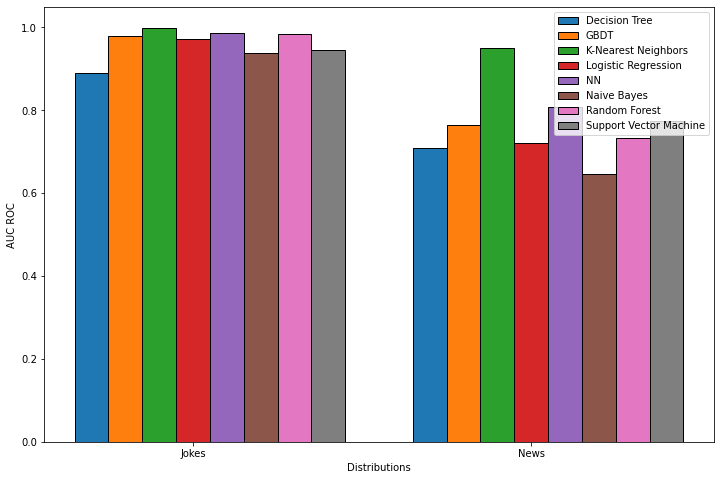

In [80]:
ind = np.arange(2)

plt.figure(figsize=(12,8))

algorithm_names = ['Decision Tree', 'GBDT', 'K-Nearest Neighbors', 'Logistic Regression',
                   'NN', 'Naive Bayes', 'Random Forest', 'Support Vector Machine']
for i, val in enumerate(np.hstack([plot_jokes_df.values[:,1:], plot_news_df.values[:,1:]])):
    plt.bar(ind + i*0.1, val, 0.1, label=algorithm_names[i], ec="k")


plt.xlabel('Distributions')
plt.ylabel('AUC ROC')
plt.xticks(ind+0.3, ('Jokes', 'News'))
plt.legend()
plt.show()

## Original text classifier

In [26]:
ext = df[['original_text', 'label']].loc[df['label'] == 1].values.tolist()
neu = df[['original_text', 'label']].loc[df['label'] == 0].values.tolist()

In [27]:
%%time
results.append(['original_default', classification_results(ext, neu, 'default')])

NameError: name 'results' is not defined

In [28]:
%%time
results.append(['original_under', classification_results(ext, neu, 'under')])

NameError: name 'results' is not defined

27479 1857
(40478, 9490)


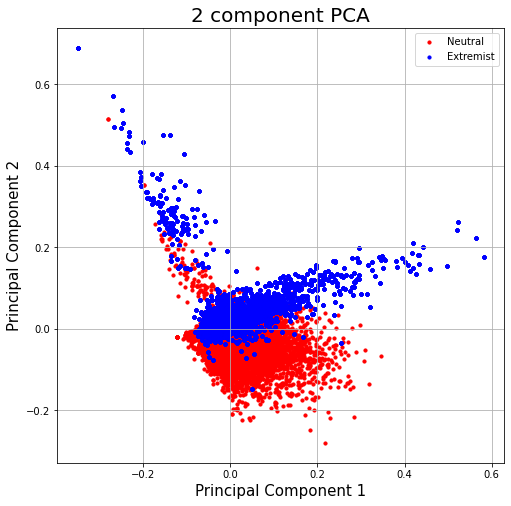

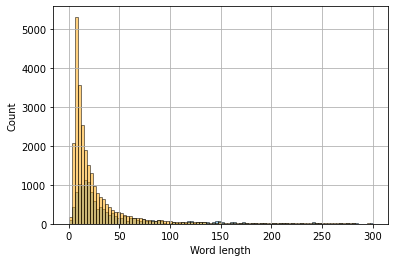

Logistic Regression
accuracy score: 0.9764081027667985
precision score: 0.977760127084988
recall score: 0.948016942626107
f1 score: 0.9626588465298141
roc auc score: 0.9953459875751555
K-Nearest Neighbors
accuracy score: 0.8131175889328063
precision score: 0.9632478632478633
recall score: 0.4339622641509434
f1 score: 0.5983541279532785
roc auc score: 0.9885318526426515
Support Vector Machine
accuracy score: 0.9938241106719368
precision score: 0.9911299652911685
recall score: 0.9896033885252215
f1 score: 0.9903660886319847
roc auc score: 0.9953459175515721
Naive Bayes
accuracy score: 0.9184782608695652
precision score: 0.8033197619793297
recall score: 0.9876780901039661
f1 score: 0.8860103626943004
roc auc score: 0.9391587142633768
Decision Tree
accuracy score: 0.979001976284585
precision score: 0.9472908219683007
recall score: 0.9896033885252215
f1 score: 0.9679849340866289
roc auc score: 0.9862402608574541
Random Forest
accuracy score: 0.987401185770751
precision score: 0.971644612476

In [ ]:
%%time
results.append(['original_over', classification_results(ext, neu, 'over')])

## Dictionaries stemming

In [ ]:
ext = df[['dictionaries_words_stem', 'label']].loc[df['label'] == 1].values.tolist()
neu = df[['dictionaries_words_stem', 'label']].loc[df['label'] == 0].values.tolist()

(29336, 3734)


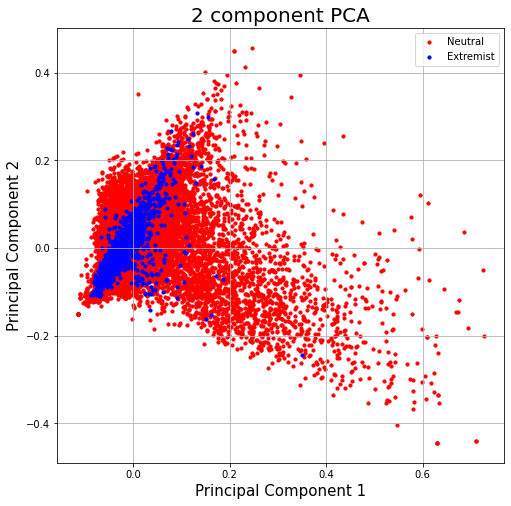

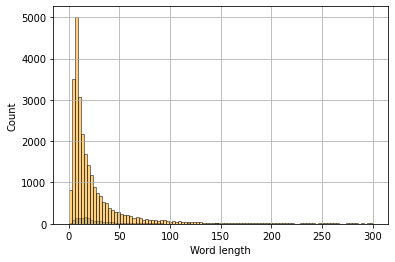

Logistic Regression
accuracy score: 0.9633605998636674
precision score: 0.9351851851851852
recall score: 0.5012406947890818
f1 score: 0.6526655896607432
roc auc score: 0.9679399017887347
K-Nearest Neighbors
accuracy score: 0.9362644853442399
precision score: 0.8717948717948718
recall score: 0.08436724565756824
f1 score: 0.15384615384615383
roc auc score: 0.6713423341407876
Support Vector Machine
accuracy score: 0.9706884798909339
precision score: 0.9358490566037736
recall score: 0.6153846153846154
f1 score: 0.7425149700598802
roc auc score: 0.9612551336159045
Naive Bayes
accuracy score: 0.6552488070892979
precision score: 0.1517626827171109
recall score: 0.8759305210918115
f1 score: 0.25870282154635393
roc auc score: 0.7579875544577608
Decision Tree
accuracy score: 0.9637014314928425
precision score: 0.7526595744680851
recall score: 0.7022332506203474
f1 score: 0.7265725288831836
roc auc score: 0.8469030305644537
Random Forest
accuracy score: 0.9739263803680982
precision score: 0.89556

In [ ]:
%%time
results.append(['dictionaries_words_default', classification_results(ext, neu, 'default')])

(3714, 4375)


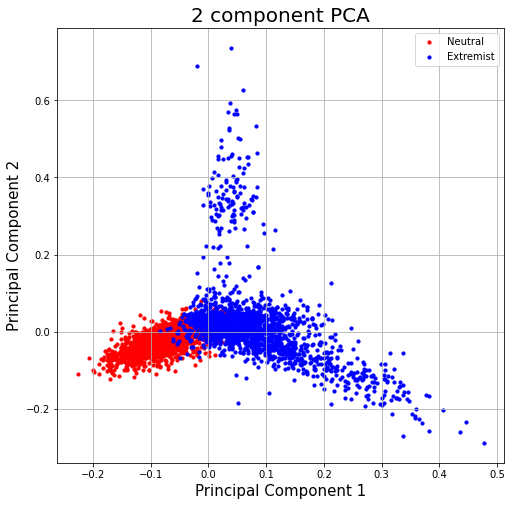

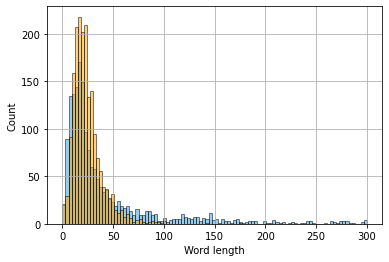

Logistic Regression
accuracy score: 0.9084791386271871
precision score: 0.8778054862842892
recall score: 0.9487870619946092
f1 score: 0.9119170984455958
roc auc score: 0.978045387357621
K-Nearest Neighbors
accuracy score: 0.5464333781965006
precision score: 0.5876288659793815
recall score: 0.30727762803234504
f1 score: 0.40353982300884955
roc auc score: 0.6111968524476133
Support Vector Machine
accuracy score: 0.9152086137281292
precision score: 0.9325842696629213
recall score: 0.894878706199461
f1 score: 0.9133425034387896
roc auc score: 0.9304190939918268
Naive Bayes
accuracy score: 0.8855989232839838
precision score: 0.8783068783068783
recall score: 0.894878706199461
f1 score: 0.8865153538050735
roc auc score: 0.8856113961104831
Decision Tree
accuracy score: 0.8129205921938089
precision score: 0.9328358208955224
recall score: 0.6738544474393531
f1 score: 0.7824726134585288
roc auc score: 0.88191968814306
Random Forest
accuracy score: 0.8842530282637954
precision score: 0.93313069908

In [ ]:
%%time
results.append(['dictionaries_words_under', classification_results(ext, neu, 'under')])

27479 1857
(40478, 4508)


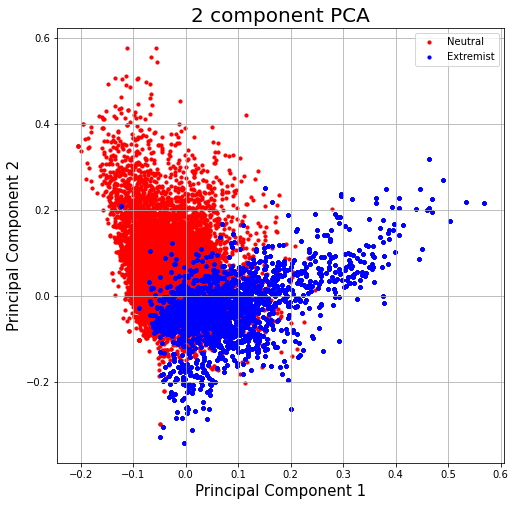

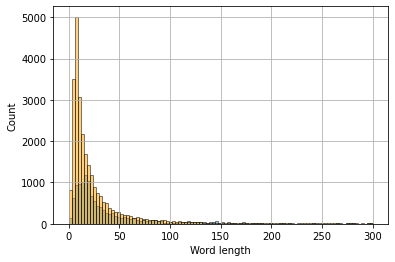

Logistic Regression
accuracy score: 0.945899209486166
precision score: 0.9530004196391104
recall score: 0.8744705429341548
f1 score: 0.9120481927710844
roc auc score: 0.9831822609536666
K-Nearest Neighbors
accuracy score: 0.8485671936758893
precision score: 0.9172245891661595
recall score: 0.5802849441663458
f1 score: 0.7108490566037735
roc auc score: 0.9646227903095483
Support Vector Machine
accuracy score: 0.9755434782608695
precision score: 0.9773179466772781
recall score: 0.9457065845206007
f1 score: 0.9612524461839531
roc auc score: 0.9821709103408937
Naive Bayes
accuracy score: 0.8495553359683794
precision score: 0.6872115123540592
recall score: 0.9745860608394301
f1 score: 0.8060509554140127
roc auc score: 0.8882954040091162
Decision Tree
accuracy score: 0.9544219367588933
precision score: 0.908357771260997
recall score: 0.954177897574124
f1 score: 0.9307042253521126
roc auc score: 0.9760320828451815
Random Forest
accuracy score: 0.9657855731225297
precision score: 0.94006069802

In [ ]:
%%time
results.append(['dictionaries_words_over', classification_results(ext, neu, 'over')])

## 76k words stemming

In [ ]:
ext = df[['76k_words_stem', 'label']].loc[df['label'] == 1].values.tolist()
neu = df[['76k_words_stem', 'label']].loc[df['label'] == 0].values.tolist()

(29336, 4641)


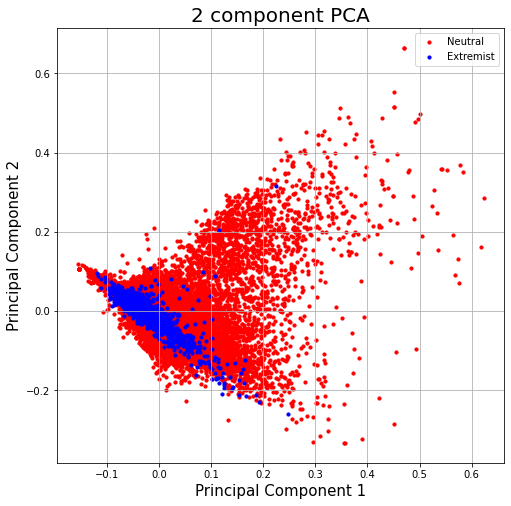

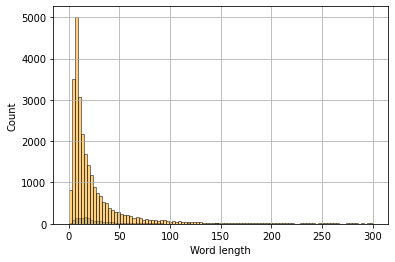

Logistic Regression
accuracy score: 0.9621676891615542
precision score: 0.9330143540669856
recall score: 0.4838709677419355
f1 score: 0.6372549019607844
roc auc score: 0.9756210852276727
K-Nearest Neighbors
accuracy score: 0.9326857532379005
precision score: 0.8333333333333334
recall score: 0.02481389578163772
f1 score: 0.04819277108433735
roc auc score: 0.6193359955866228
Support Vector Machine
accuracy score: 0.9691547375596455
precision score: 0.937007874015748
recall score: 0.5905707196029777
f1 score: 0.7245053272450533
roc auc score: 0.9702364925456151
Naive Bayes
accuracy score: 0.7077368779822768
precision score: 0.16666666666666666
recall score: 0.8138957816377171
f1 score: 0.27667650780261493
roc auc score: 0.7580999321193518
Decision Tree
accuracy score: 0.9643830947511929
precision score: 0.7461928934010152
recall score: 0.7295285359801489
f1 score: 0.737766624843162
roc auc score: 0.8604414739408689
Random Forest
accuracy score: 0.9734151329243353
precision score: 0.884735

In [ ]:
%%time
results.append(['76k_words_stem_default', classification_results(ext, neu, 'default')])

(3714, 4999)


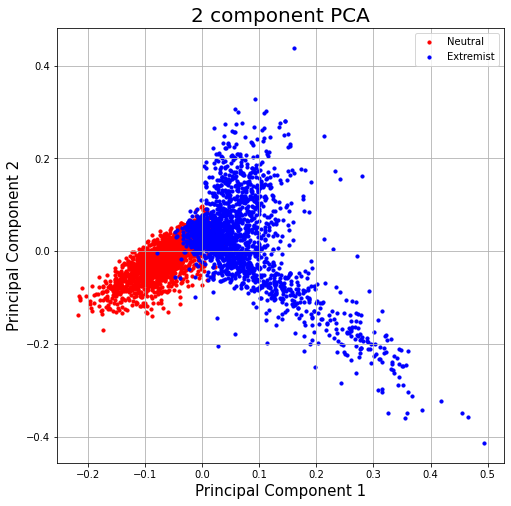

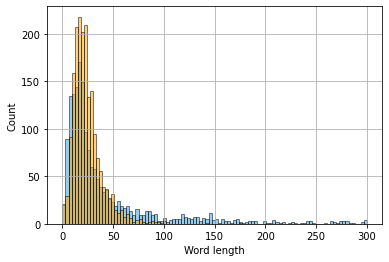

Logistic Regression
accuracy score: 0.9313593539703903
precision score: 0.9166666666666666
recall score: 0.9487870619946092
f1 score: 0.9324503311258278
roc auc score: 0.9845049705822682
K-Nearest Neighbors
accuracy score: 0.522207267833109
precision score: 0.5816326530612245
recall score: 0.15363881401617252
f1 score: 0.24307036247334757
roc auc score: 0.5782721792307914
Support Vector Machine
accuracy score: 0.9219380888290714
precision score: 0.9335180055401662
recall score: 0.9083557951482479
f1 score: 0.9207650273224043
roc auc score: 0.9478125090571835
Naive Bayes
accuracy score: 0.8775235531628532
precision score: 0.8763440860215054
recall score: 0.8787061994609164
f1 score: 0.8775235531628534
roc auc score: 0.877525142741211
Decision Tree
accuracy score: 0.8075370121130552
precision score: 0.9130434782608695
recall score: 0.6792452830188679
f1 score: 0.7789799072642967
roc auc score: 0.8932737732950758
Random Forest
accuracy score: 0.892328398384926
precision score: 0.944954128

In [ ]:
%%time
results.append(['76k_words_stem_under', classification_results(ext, neu, 'under')])

27479 1857
(40478, 5387)


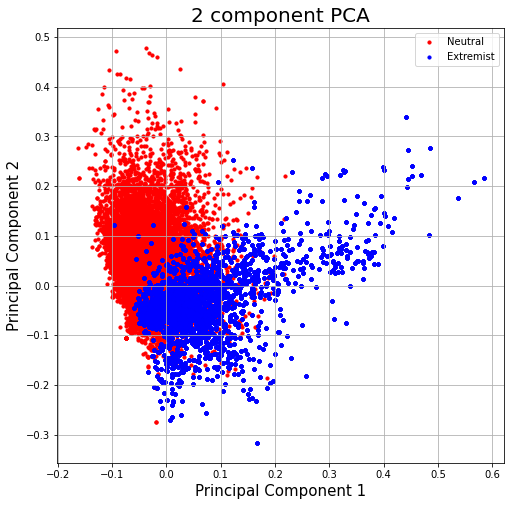

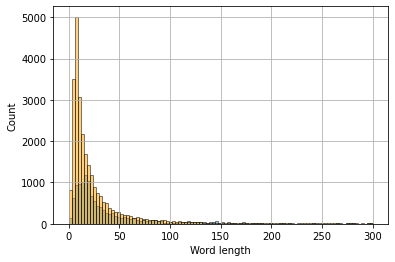

Logistic Regression
accuracy score: 0.9608448616600791
precision score: 0.962287104622871
recall score: 0.9137466307277629
f1 score: 0.9373888998617421
roc auc score: 0.9911195741613819
K-Nearest Neighbors
accuracy score: 0.8422677865612648
precision score: 0.9269081500646831
recall score: 0.5517905275317674
f1 score: 0.6917692493362297
roc auc score: 0.9680330438488379
Support Vector Machine
accuracy score: 0.9882658102766798
precision score: 0.9867704280155642
recall score: 0.9765113592606854
f1 score: 0.9816140894135863
roc auc score: 0.9925415430662893
Naive Bayes
accuracy score: 0.8593132411067194
precision score: 0.6959677419354838
recall score: 0.9969195225259915
f1 score: 0.8196928921956625
roc auc score: 0.8968587630628119
Decision Tree
accuracy score: 0.964550395256917
precision score: 0.916366258111031
recall score: 0.9788217173661917
f1 score: 0.9465648854961832
roc auc score: 0.9778980712914302
Random Forest
accuracy score: 0.9788784584980237
precision score: 0.95635816403

In [ ]:
%%time
results.append(['76k_words_stem_over', classification_results(ext, neu, 'over')])

## Getting results

In [ ]:
finish = []
for i in range(len(results[1:])):
  for j in range(len(results[1:][i][1])):
    finish.append([results[1:][i][0], results[1:][i][1][j][0]] + results[1:][i][1][j][1][:5])

In [ ]:
finish = pd.DataFrame(finish, columns=['method', 'algorythm', 'accuracy', 'precision', 'recall', 'f1-score', 'roc auc score'])
finish.head()

,method,algorythm,accuracy,precision,recall,f1-score,roc auc score
0,original_default,Logistic Regression,0.957907,0.953488,0.406948,0.570435,0.974777
1,original_default,K-Nearest Neighbors,0.933027,0.812500,0.032258,0.062053,0.573876
2,original_default,Support Vector Machine,0.966428,0.951754,0.538462,0.687797,0.972328
3,original_default,Naive Bayes,0.777948,0.206266,0.784119,0.326615,0.780582
4,original_default,Decision Tree,0.962338,0.747283,0.682382,0.713359,0.842209


In [ ]:
finish['sampling'] = finish.method.apply(lambda x: 'default' if 'default' in x else 'under' if 'under' in x else 'over')

In [ ]:
finish['method'] = finish.method.apply(lambda x: x[:-len('default')-1] if 'default' in x else x[:-len('under')-1] if 'under' in x else x[:-len('over')-1])

In [ ]:
finish = pd.DataFrame(np.concatenate((finish.values[:,0:1], finish.values[:,-1:], finish.values[:,1:-1]), axis=1), columns=['method', 'sampling', 'algorythm', 'accuracy', 'precision', 'recall', 'f1-score', 'roc-auc score'])

In [ ]:
finish.head()

,method,sampling,algorythm,accuracy,precision,recall,f1-score,roc-auc score
0,original,default,Logistic Regression,0.957907,0.953488,0.406948,0.570435,0.974777
1,original,default,K-Nearest Neighbors,0.933027,0.8125,0.0322581,0.0620525,0.573876
2,original,default,Support Vector Machine,0.966428,0.951754,0.538462,0.687797,0.972328
3,original,default,Naive Bayes,0.777948,0.206266,0.784119,0.326615,0.780582
4,original,default,Decision Tree,0.962338,0.747283,0.682382,0.713359,0.842209


In [ ]:
last = []
for i in last_df:
    for j in i[2:]:
        last.append([i[0], i[1]] + j)
finish = pd.DataFrame(last, columns=['method', 'sampling','algorythm', 'accuracy', 'precision', 'recall', 'f1-score', 'roc auc score'])

In [ ]:
finish.to_csv('result_23.34.csv', index=False)

## Visualization

In [ ]:
finish = pd.read_csv('result_23.34.csv')
finish

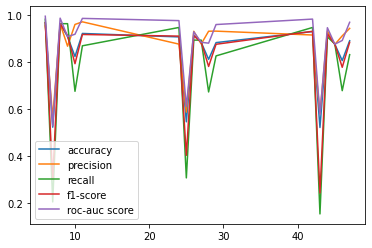

In [ ]:
finish[finish['sampling'] == 'under'].plot()

method
before    AxesSubplot(0.125,0.125;0.775x0.755)
large     AxesSubplot(0.125,0.125;0.775x0.755)
simple    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

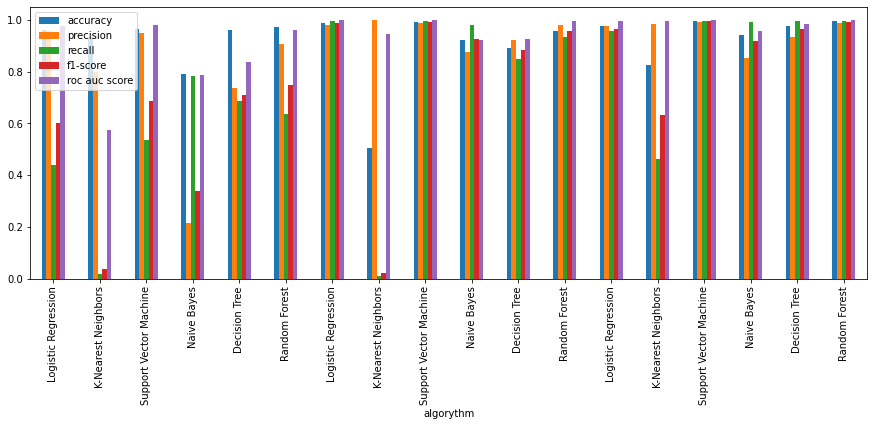

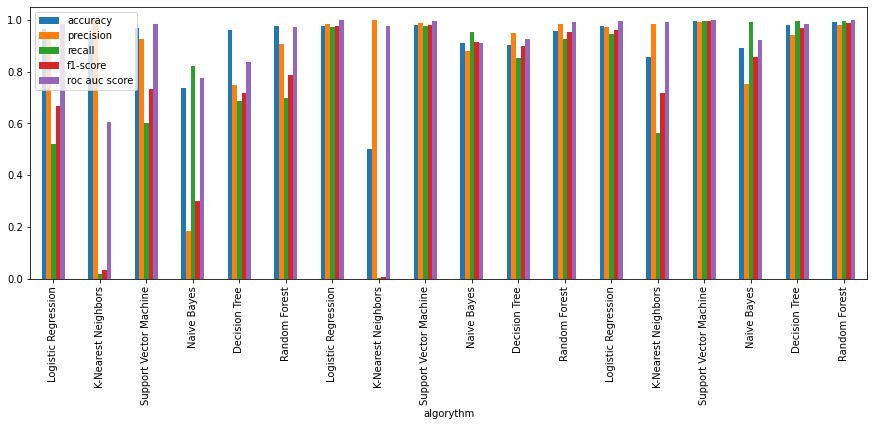

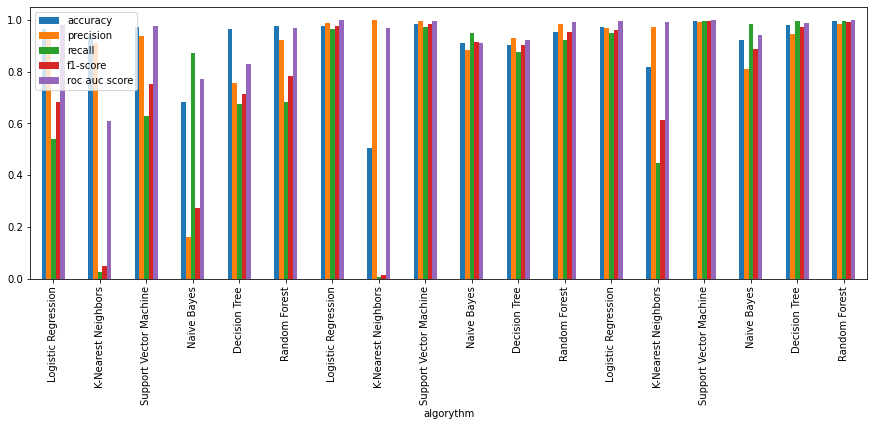

In [ ]:
finish.groupby(['method']).plot(x='algorythm', kind='bar', figsize=(15,5))

# Old

## All process oldest

 Prepocess and Visualization

In [ ]:
print('doc count:', balanced.loc[balanced['label'] == 1].shape[0])

print('word counts:', balanced[balanced.label == 1]['text'].\
apply(lambda x: len(x.split(' '))).sum())

print('all doc lengths:', balanced[balanced.label == 1]['text'].\
apply(len).sum())

print('all doc word counts mean:', balanced[balanced.label == 1]['text'].\
apply(lambda x: len(x.split(' '))).mean())

print('all doc word lengths mean:', balanced[balanced.label == 1]['text'].\
apply(lambda x: len(''.join(x.split(' ')))/len(x.split(' '))).mean())




print('doc count:', balanced.loc[balanced['label'] == 0].shape[0])

print('word counts:', balanced[balanced.label == 0]['text'].\
apply(lambda x: len(x.split(' '))).sum())

print('all doc lengths:', balanced[balanced.label == 0]['text'].\
apply(len).sum())

print('all doc word counts mean:', balanced[balanced.label == 0]['text'].\
apply(lambda x: len(x.split(' '))).mean())

print('all doc word lengths mean:', balanced[balanced.label == 0]['text'].\
apply(lambda x: len(''.join(x.split(' ')))/len(x.split(' '))).mean())

doc count: 1857
word counts: 163230
all doc lengths: 962109
all doc word counts mean: 87.89983844911147
all doc word lengths mean: 4.932914554068625
doc count: 27479
word counts: 1044790
all doc lengths: 5550898
all doc word counts mean: 38.02139815859383
all doc word lengths mean: 4.322275456221419


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Word length')]

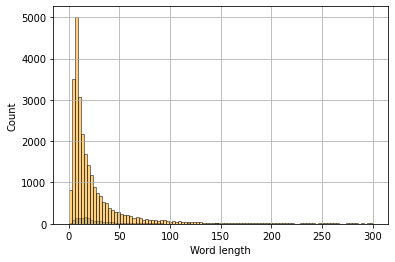

In [ ]:
balanced[balanced.label == 1]['text'].\
apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", edgecolor="black", color = '#3498db', range=(0,300), alpha=0.5).set(xlabel = 'Word length', ylabel = 'Count')
balanced[balanced.label == 0]['text'].\
apply(lambda x: len(x.split(' '))).hist(bins=100, ec="k", edgecolor="black", color = 'orange', range=(0,300), alpha=0.5).set(xlabel = 'Word length', ylabel = 'Count')

In [ ]:
balanced['category'] = balanced['label'].apply(lambda x: "extremist" if x==1 else "neutral")
balanced

,text,label,category
0,ли ту сирия алла islamstateқа қарсы ұрыс баста,1,extremist
1,террор ит бүлікшіл айнала turkey pkk twitterku...,1,extremist
2,әл газ арнайы аймақ ол кейін ол ал қай орал,1,extremist
3,сирия ресей n басы кіру туралы алаңда кіру мүм...,1,extremist
4,ядролы соғыс соғыс келе жатыр,1,extremist
...,...,...,...
29331,періште көп араб малай жекеше араб малай алла ...,0,neutral
29332,иман алты шарт ең әуелгі алла тағала иман ақыл...,0,neutral
29333,иман иман араб сенім сену илан қабылдау алла т...,0,neutral
29334,асса аса сабырлы club qissa angimeler,0,neutral


In [ ]:
stopwords = ['егер', 'сонда', 'дейді', 'не', 'екі', 'керек', 'болса', 'болды', 'ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'пен', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дәнеңе', 'ешқашан', 'ешқандай', 'ешқайсы', 'емес', 'бәрі', 'барлық', 'барша', 'бар', 'күллі', 'бүкіл', 'түгел', 'өз', 'өзім', 'өзің', 'өзінің', 'өзіме', 'өзіне', 'өзімнің', 'өзі', 'өзге', 'менде', 'сенде', 'онда', 'менен', 'сенен\tонан', 'одан', 'ау', 'па', 'ей', 'әй', 'е', 'уа', 'уау', 'уай', 'я', 'пай', 'ә', 'о', 'оһо', 'ой', 'ие', 'аһа', 'ау', 'беу', 'мәссаған', 'бәрекелді', 'әттегенай', 'жаракімалла', 'масқарай', 'астапыралла', 'япырмай', 'ойпырмай', 'кәне', 'кәнеки', 'ал', 'әйда', 'кәні', 'міне', 'әні', 'сорап', 'қош-қош', 'пфша', 'пішә', 'құрау-құрау', 'шәйт', 'шек', 'моһ', 'тәк', 'құрау', 'құр', 'кә', 'кәһ', 'күшім', 'күшім', 'мышы', 'пырс', 'әукім', 'алақай', 'паһ-паһ', 'бәрекелді', 'ура', 'әттең', 'әттеген-ай', 'қап', 'түге', 'пішту', 'шіркін', 'алатау', 'пай-пай', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'арс', 'гүрс', 'дүрс', 'қорс', 'тарс', 'тырс', 'ырс', 'барқ', 'борт', 'күрт', 'кірт', 'морт', 'сарт', 'шырт', 'дүңк', 'күңк', 'қыңқ', 'мыңқ', 'маңқ', 'саңқ', 'шаңқ', 'шіңк', 'сыңқ', 'таңқ', 'тыңқ', 'ыңқ', 'болп', 'былп', 'жалп', 'желп', 'қолп', 'ірк', 'ырқ', 'сарт-сұрт', 'тарс-тұрс', 'арс-ұрс', 'жалт-жалт', 'жалт-жұлт', 'қалт-қалт', 'қалт-құлт', 'қаңқ-қаңқ', 'қаңқ-құңқ', 'шаңқ-шаңқ', 'шаңқ-шұңқ', 'арбаң-арбаң', 'бүгжең-бүгжең', 'арсалаң-арсалаң', 'ербелең-ербелең', 'батыр-бұтыр', 'далаң-далаң', 'тарбаң-тарбаң', 'қызараң-қызараң', 'қаңғыр-күңгір', 'қайқаң-құйқаң', 'митың-митың', 'салаң-сұлаң', 'ыржың-тыржың', 'бірақ', 'алайда', 'дегенмен', 'әйтпесе', 'әйткенмен', 'себебі', 'өйткені', 'сондықтан', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'арнайы', 'осындай', 'ғана', 'қана', 'тек', 'әншейін', 'мен', 'да', 'бола', 'бір', 'де', 'сен', 'мені', 'сені', 'және', 'немесе', 'оны', 'еді', 'жатыр', 'деп', 'деді', 'тұр', 'тар', 'жаты', 'болып', ' ']

tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords)
responses = tfidf.fit_transform(balanced['text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
view = pd.DataFrame(responses.sum(axis=0).T, index=tfidf.get_feature_names(), columns=["TF-IDF"])
view = view.sort_values('TF-IDF', ascending=False)
# view.to_csv('/content/drive/My Drive/Top_words_tf-idf.csv')
view

,TF-IDF
алла,1064.942260
бол,700.390073
адам,623.748194
он,451.764960
ет,419.304571
...,...
яғ,0.008357
бым,0.008357
тәруия,0.008357
пін,0.008357


Validation method

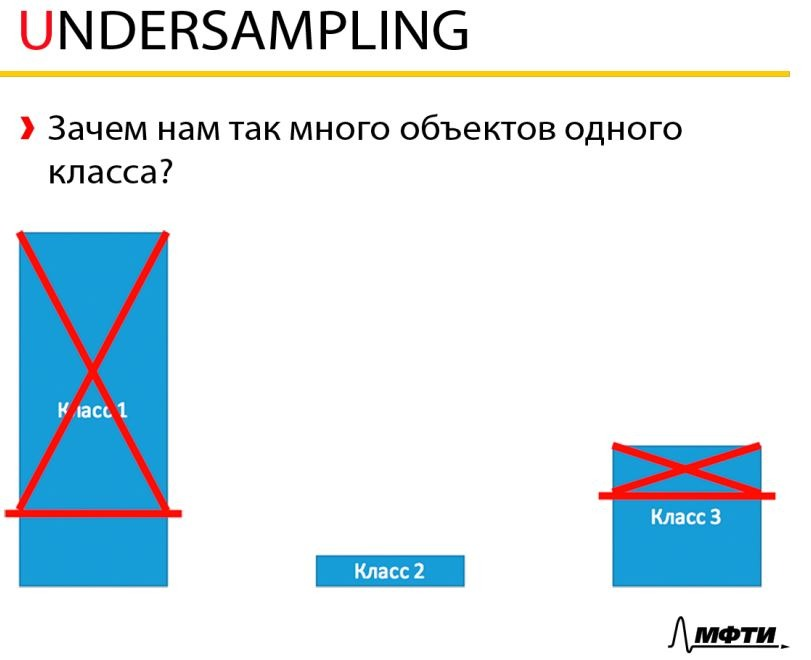

In [ ]:
def pieceplot(df, column_name):
    ext = df[[column_name, 'label']].loc[df['label'] == 1].values.tolist()[:1857]
    neu = df[[column_name, 'label']].loc[df['label'] == 0].values.tolist()

    balanced = pd.DataFrame(ext+neu, columns = ['text', 'label'])
    for i in range(1, 15):
        X_train, X_test, y_train, y_test = train_test_split(balanced[balanced.label == 1]['text'].tolist() + balanced[balanced.label == 0]['text'][i*1857:(i+1)*1857].tolist(), 
                                                        balanced[balanced.label == 1]['label'].tolist() + balanced[balanced.label == 0]['label'][i*1857:(i+1)*1857].tolist(),
                                                        test_size = 0.2)

        vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords) #76k algortithms
        X_train_cv = vectorizer.fit_transform(X_train)
        X_test_cv = vectorizer.transform(X_test)
        y_train, y_test = np.array(y_train), np.array(y_test)


        naive_bayes = MultinomialNB()
        naive_bayes.fit(X_train_cv, y_train)
        predictions = naive_bayes.predict(X_test_cv)

        from sklearn.metrics import classification_report
        target_names = ['Neutral', 'Extremist']
        print(classification_report(y_test, predictions, target_names=target_names))


        sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
        xticklabels=['extremist', 'neutral'], yticklabels=['extremist', 'neutral'])
        plt.title('neutral range: ['+str((i-1)*1857)+':'+str(i*1857)+']')
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.97      0.97      0.97       383
   Extremist       0.97      0.97      0.97       360

    accuracy                           0.97       743
   macro avg       0.97      0.97      0.97       743
weighted avg       0.97      0.97      0.97       743



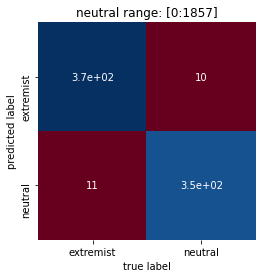

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.98      0.97      0.97       354
   Extremist       0.97      0.98      0.98       389

    accuracy                           0.98       743
   macro avg       0.98      0.98      0.98       743
weighted avg       0.98      0.98      0.98       743



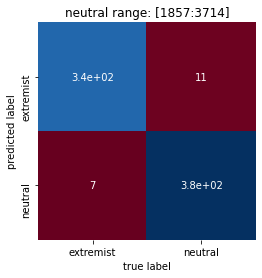

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.96      0.80      0.88       377
   Extremist       0.83      0.97      0.89       366

    accuracy                           0.89       743
   macro avg       0.90      0.89      0.89       743
weighted avg       0.90      0.89      0.88       743



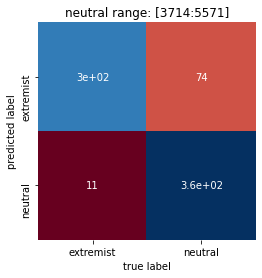

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.95      0.86      0.90       367
   Extremist       0.88      0.95      0.91       376

    accuracy                           0.91       743
   macro avg       0.91      0.91      0.91       743
weighted avg       0.91      0.91      0.91       743



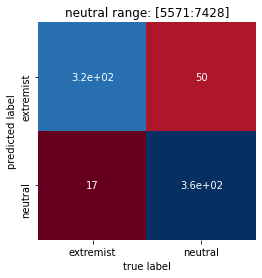

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.94      0.96      0.95       360
   Extremist       0.96      0.95      0.95       383

    accuracy                           0.95       743
   macro avg       0.95      0.95      0.95       743
weighted avg       0.95      0.95      0.95       743



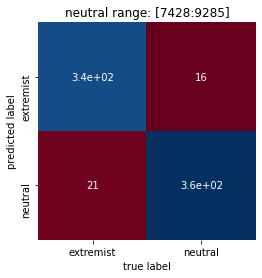

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.93      0.93      0.93       371
   Extremist       0.93      0.93      0.93       372

    accuracy                           0.93       743
   macro avg       0.93      0.93      0.93       743
weighted avg       0.93      0.93      0.93       743



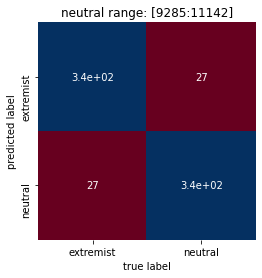

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.94      0.96      0.95       360
   Extremist       0.97      0.94      0.95       383

    accuracy                           0.95       743
   macro avg       0.95      0.95      0.95       743
weighted avg       0.95      0.95      0.95       743



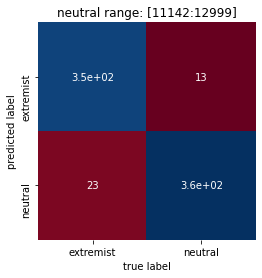

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.96      0.96      0.96       385
   Extremist       0.96      0.96      0.96       358

    accuracy                           0.96       743
   macro avg       0.96      0.96      0.96       743
weighted avg       0.96      0.96      0.96       743



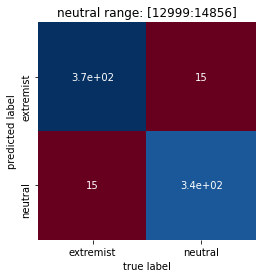

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.95      0.95      0.95       378
   Extremist       0.95      0.95      0.95       365

    accuracy                           0.95       743
   macro avg       0.95      0.95      0.95       743
weighted avg       0.95      0.95      0.95       743



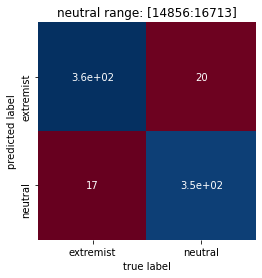

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.95      0.92      0.93       370
   Extremist       0.92      0.95      0.94       373

    accuracy                           0.93       743
   macro avg       0.93      0.93      0.93       743
weighted avg       0.93      0.93      0.93       743



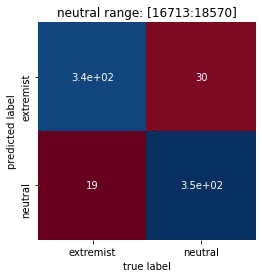

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.94      0.95      0.94       346
   Extremist       0.95      0.94      0.95       397

    accuracy                           0.94       743
   macro avg       0.94      0.94      0.94       743
weighted avg       0.94      0.94      0.94       743



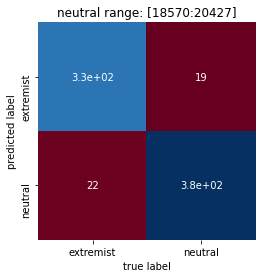

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.96      0.93      0.94       373
   Extremist       0.93      0.96      0.95       370

    accuracy                           0.94       743
   macro avg       0.95      0.94      0.94       743
weighted avg       0.95      0.94      0.94       743



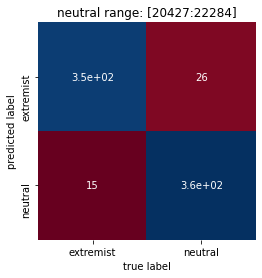

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.94      0.91      0.93       370
   Extremist       0.91      0.94      0.93       373

    accuracy                           0.93       743
   macro avg       0.93      0.93      0.93       743
weighted avg       0.93      0.93      0.93       743



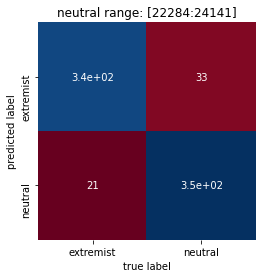

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

     Neutral       0.97      0.83      0.89       316
   Extremist       0.87      0.97      0.92       352

    accuracy                           0.91       668
   macro avg       0.92      0.90      0.91       668
weighted avg       0.91      0.91      0.91       668



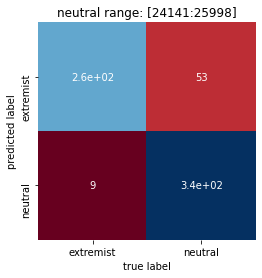

In [ ]:
pieceplot(df, '76k_words_stem')

Simple method

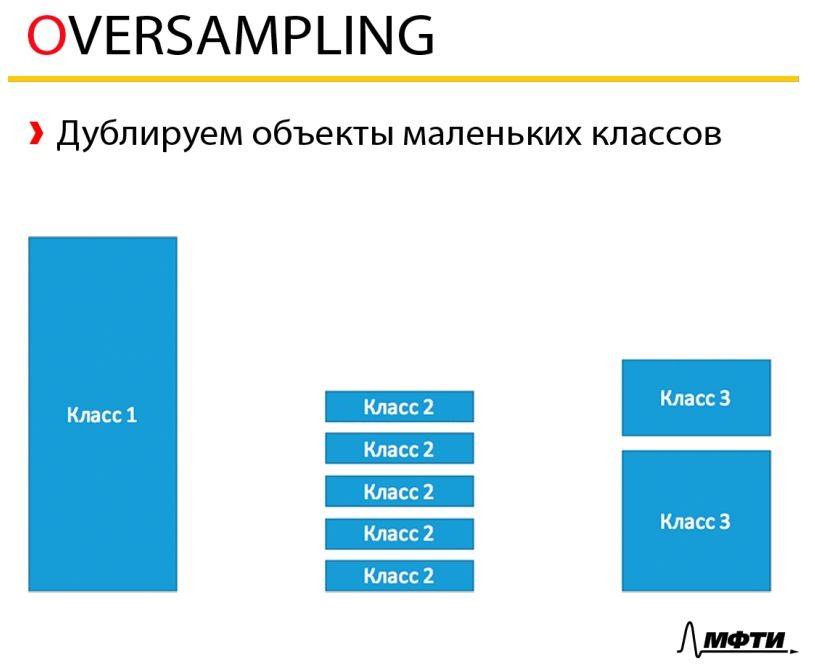

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced['text'], balanced['label'], random_state=40, test_size = 0.2)
len(X_test)

5868

In [ ]:
#vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords)
#vectorizer = TfidfVectorizer(lowercase=True, stop_words=[], max_df = 0.0063, min_df=0.0006) #dictionaries
#vectorizer = TfidfVectorizer(lowercase=True, stop_words=[], max_df = 0.0061, min_df=0.0005) #28kwords
#vectorizer = TfidfVectorizer(lowercase=True, stop_words=[], max_df = 0.0060, min_df=0.0006) #golang algortithms
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords, max_df = 0.1, min_df=0.0006) #76k algortithms
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)
X_test_cv.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(5868, 4406)

              precision    recall  f1-score   support

     Neutral       0.95      1.00      0.97      5465
   Extremist       0.99      0.23      0.37       403

    accuracy                           0.95      5868
   macro avg       0.97      0.62      0.67      5868
weighted avg       0.95      0.95      0.93      5868



Text(91.68, 0.5, 'predicted label')

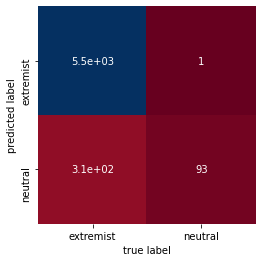

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train.tolist())
predictions = naive_bayes.predict(X_test_cv)

from sklearn.metrics import classification_report
target_names = ['Neutral', 'Extremist']
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['extremist', 'neutral'], yticklabels=['extremist', 'neutral'])
plt.xlabel('true label')
plt.ylabel('predicted label')

              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00      5499
   Extremist       0.99      1.00      1.00      2597

    accuracy                           1.00      8096
   macro avg       1.00      1.00      1.00      8096
weighted avg       1.00      1.00      1.00      8096



Text(91.68, 0.5, 'predicted label')

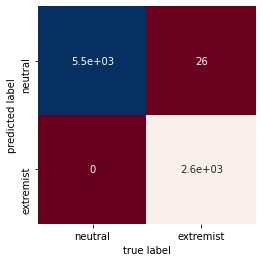

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_cv, y_train.tolist())
predictions = RF.predict(X_test_cv)
from sklearn.metrics import classification_report
target_names = ['Neutral', 'Extremist']
print(classification_report(y_test, predictions, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## All classification

Accuracy score: 0.9930830039525692
Precision score: 0.9814323607427056
Recall score: 0.9973045822102425
F1 score: 0.9893048128342246


Text(91.68, 0.5, 'predicted label')

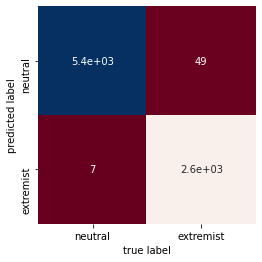

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train_cv, y_train.tolist())
predictions = RF.predict(X_test_cv)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

Accuracy score: 0.9993824110671937
Precision score: 0.9980784012298232
Recall score: 1.0
F1 score: 0.9990382765916522


Text(91.68, 0.5, 'predicted label')

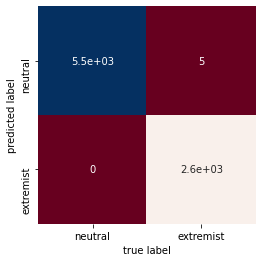

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(1)
model.fit(X_train_cv, y_train.tolist())
predictions = model.predict(X_test_cv)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=0.025)
svm.fit(X_train_cv, y_train.tolist())
predictions = svm.predict(X_test_cv)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')